In [1]:
import pandas as pd
import numpy as# np
import matplotlib.pyplot as plt

In [4]:
pldy = pd.read_csv("yyy20.csv", header=0)
pldy.head(2)

,AGENCY,YEAR,COUNTS
0,DCA,2017,15034
1,DCA,2016,16063


In [22]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

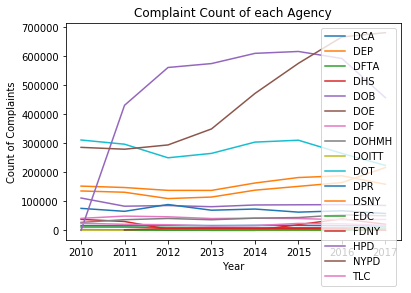

In [24]:

colorList =[]
for agency in pldy["AGENCY"].unique():
    temp = pldy[pldy["AGENCY"]==agency]
    plt.plot(temp["YEAR"], temp["COUNTS"])
    colorList.append(agency)

plt.xlabel('Year')
plt.ylabel('Count of Complaints')
plt.legend(colorList, loc='upper right', prop=fontP)
#pp = PdfPages("ww1_borough_complaint_Vs_Year.pdf")
plt.title("Complaint Count of each Agency")
#plt.savefig(pp, format="pdf")
plt.savefig("yyy20_Agency_ComplaintCount_Vs_year_4.png")
plt.show()

In [51]:
yyy21 = pd.read_csv("yyy21.csv", header=0)
yyy22 = pd.read_csv("yyy22.csv", header=0)
yyy23 = pd.read_csv("yyy23.csv", header=0)
yyy24 = pd.read_csv("yyy24.csv", header=0)
yyy25 = pd.read_csv("yyy25.csv", header=0)

yyy_all = yyy21.merge(yyy22, on="Month", suffixes=('_BROOKLYN','_QUEENS')).merge(yyy23, on="Month", suffixes=('','_MANHATTAN')).merge(yyy24, on="Month", suffixes=('','_BRONX')).merge(yyy25, on="Month", suffixes=('','_STATEN_ISLAND'))

yyy_all.columns = ['Month', 'COUNTS_BROOKLYN', 'COUNTS_QUEENS', 'COUNTS_MANHATTAN', 'COUNTS_BRONX', 'COUNTS_STATEN_ISLAND']
yyy_all

,Month,COUNTS_BROOKLYN,COUNTS_QUEENS,COUNTS_MANHATTAN,COUNTS_BRONX,COUNTS_STATEN_ISLAND
0,12,329828,231505,225484,221856,44936
1,11,378380,274143,263339,243000,52705
2,10,398547,299740,283109,231924,61644
3,9,381345,302264,252090,205886,61293
4,8,386169,307926,248282,219270,65027
5,7,393567,311433,248216,230684,65678
6,6,398759,317342,257635,218403,70022
7,5,384095,299245,266970,210568,66009
8,4,356136,278588,259550,207817,63967
9,3,391840,305403,263838,242284,71462


In [122]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

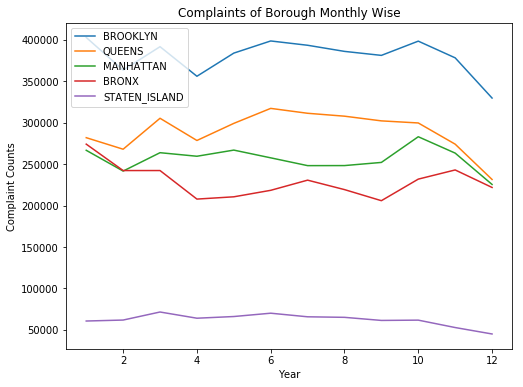

In [123]:
colorList =[]
boroughList = yyy_all.columns[1:]
for borough in boroughList:
    plt.plot(yyy_all["Month"], yyy_all[borough])
    colorList.append(borough[7:])

plt.xlabel('Year')
plt.ylabel('Complaint Counts')
plt.title('Complaints of Borough Monthly Wise')
plt.legend(colorList, loc='upper left')
plt.savefig("yyy21_25_complaint_boroughwise_monthly_2.png")
plt.show()

In [56]:
yyy20_b = pd.read_csv("yyy20_b.csv", header=0)
yyy20_b

,YEAR,COUNTS
0,HPD,3843031
1,NYPD,3604840
2,DOT,2227356
3,DEP,1267810
4,DSNY,1162831
5,DOB,711866
6,DPR,561682
7,DOF,334882
8,DOHMH,331827
9,TLC,160289


/home/apurv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


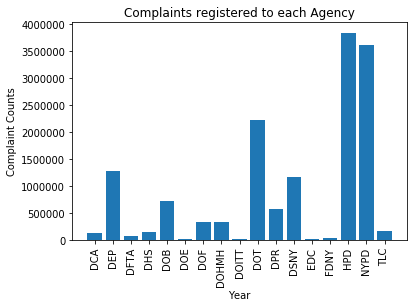

In [57]:
plt.bar(yyy20_b.ix[:,0], yyy20_b.ix[:,1])
plt.title("Complaints registered to each Agency")
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Complaint Counts')
plt.savefig("yyy20_b_agency_complaint_count.png")
plt.show()

In [59]:
yyy29 = pd.read_csv("yyy29.csv", header=0)
yyy29.head(3)

,Borough,Complaint Type,Year,Month,Counts
0,BRONX,AGENCY,2015,7,1
1,BRONX,AGENCY,2016,9,1
2,BRONX,AGENCY,2017,7,1


In [120]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

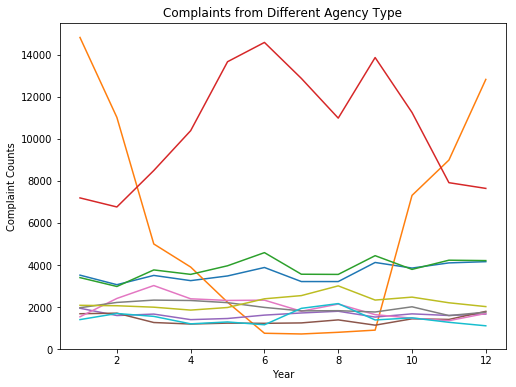

In [121]:
borough="BROOKLYN"
colorList =[]

complaintList = yyy29["Complaint Type"].unique()
for complaint in complaintList:
    if sum(yyy29[(yyy29["Complaint Type"]==complaint) & (yyy29["Year"]==2016) & (yyy29["Borough"]==borough)]["Counts"])<15000:
        continue
    tmp = yyy29[(yyy29["Complaint Type"]==complaint) & (yyy29["Year"]==2016) & (yyy29["Borough"]==borough)]
    plt.plot(tmp["Month"], tmp["Counts"])
    colorList.append(complaint)

plt.xlabel('Year')
plt.ylabel('Complaint Counts')
plt.title('Complaints from Different Agency Type')
#plt.legend(colorList, loc='upper left')
#plt.savefig("yyy29_.png")
plt.show()

In [145]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('x-small')

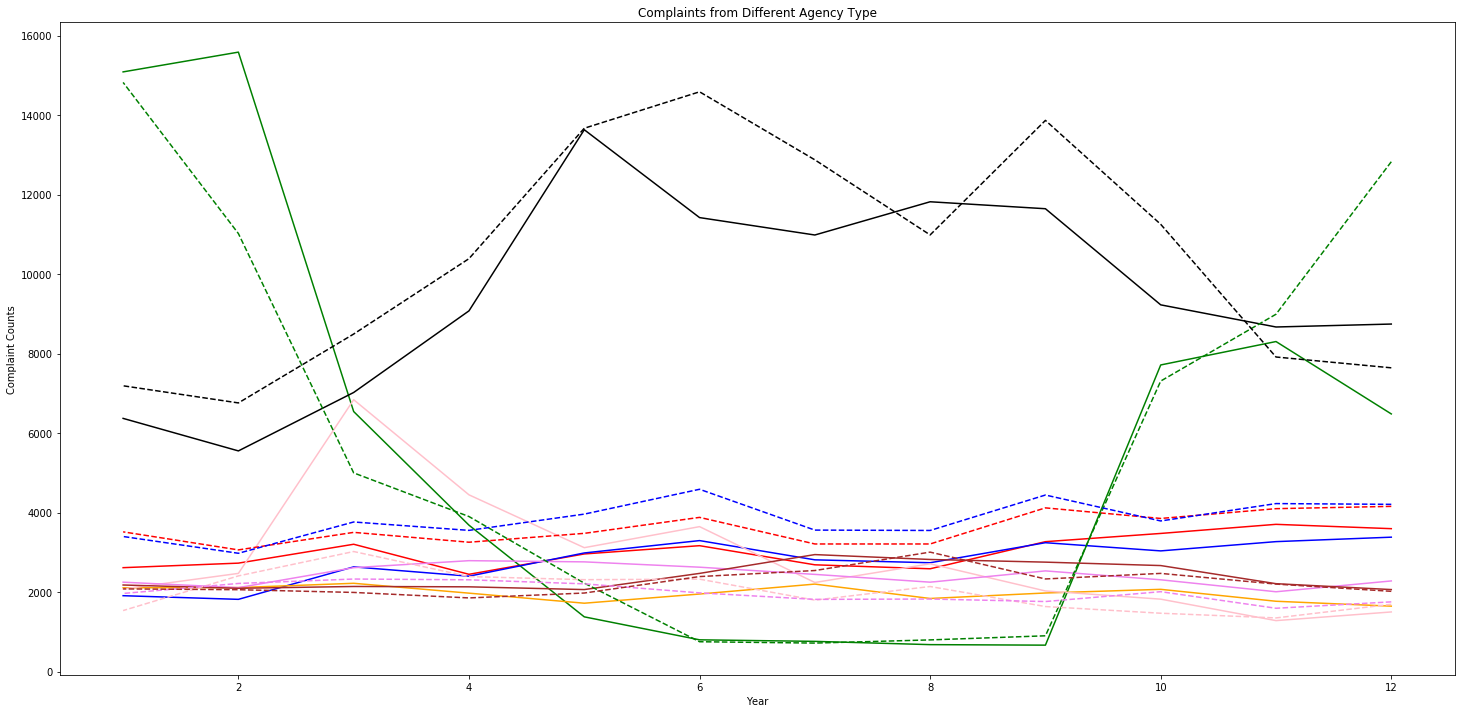

In [99]:
borough="BROOKLYN"
colorList =[]
lines = {2015:'-', 2016:'--'}#, 2017:'_'}
colorLine = {}
colors = ["red", "green", "blue", "black", "orange", "pink", "violet", "brown", "purple"]
complaintList = yyy29["Complaint Type"].unique()
#fig = plt.figure(figsize=(18, 16))
from matplotlib import rcParams
rcParams['figure.figsize'] = (25, 12)
i=0
for year in list(range(2015,2017)):
    for complaint in complaintList:
        if sum(yyy29[(yyy29["Complaint Type"]==complaint) & (yyy29["Year"]==year) & (yyy29["Borough"]==borough)]["Counts"])<20000:
            continue
        tmp = yyy29[(yyy29["Complaint Type"]==complaint) & (yyy29["Year"]==year) & (yyy29["Borough"]==borough)]
        if complaint not in colorLine.keys():
            colorLine[complaint] = colors[i]
            i +=1
        plt.plot(tmp["Month"], tmp["Counts"], lines[year], color=colorLine[complaint])
        colorList.append(complaint)

plt.xlabel('Year')
plt.ylabel('Complaint Counts')
plt.title('Complaints from Different Agency Type')
#plt.legend(colorList, loc='upper left', prop=fontP)
plt.savefig("yyy29_weather_1.png")
plt.show()

In [130]:
weather1 = pd.read_csv("newyork_weather.csv", header=0)

In [131]:
weather1[weather1["Year"]==2015]

,Year,Month,TMAX,TMIN,SNOW
108,2015,1,36,23,0.55
109,2015,2,32,15,0.49
110,2015,3,45,30,0.60
111,2015,4,62,45,0.00
112,2015,5,78,58,0.00
113,2015,6,78,63,0.00
114,2015,7,85,71,0.00
115,2015,8,86,71,0.00
116,2015,9,82,66,0.00
117,2015,10,65,50,0.00


In [147]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (9, 7)

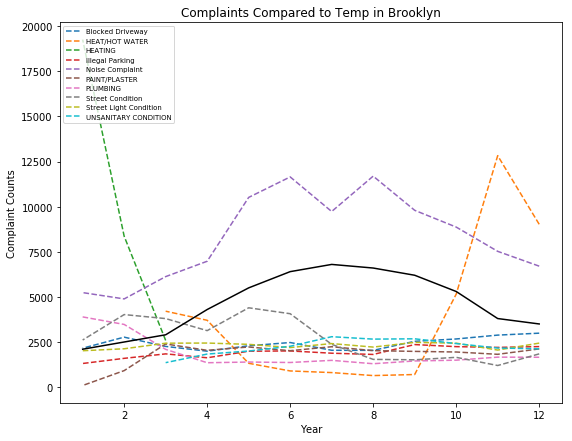

In [148]:
borough="BROOKLYN"
colorList =[]
lines = {2015:'-', 2016:'--', 2017:'_'}
complaintList = yyy29["Complaint Type"].unique()
#fig = plt.figure(figsize=(18, 16))
from matplotlib import rcParams
#rcParams['figure.figsize'] = (25, 12)
#weather[weather['Year']==2015]["Month"]*500
for complaint in complaintList:
    if sum(yyy29[(yyy29["Complaint Type"]==complaint) & (yyy29["Year"]==2014) & (yyy29["Borough"]==borough)]["Counts"])<20000:
        continue
    tmp = yyy29[(yyy29["Complaint Type"]==complaint) & (yyy29["Year"]==2014) & (yyy29["Borough"]==borough)]
    plt.plot(tmp["Month"], tmp["Counts"], lines[year])
    colorList.append(complaint)

plt.plot(weather[weather['Year']==2014]["Month"], weather[weather['Year']==2014]["TMIN"]*100, '-', color='black')
xlabelss = list(range(200))
plt.xlabel('Year')
plt.ylabel('Complaint Counts')
plt.title('Complaints Compared to Temp in Brooklyn')
plt.legend(colorList, loc='upper left', prop=fontP)
plt.savefig("yyy29_weather_1.png")
plt.show()